# Practica 0 Python


En esta práctica se pide usar el **Método de Monte Carlo** para calcular la integral deuna función dada. Utilizaremos esto para comprobar la rapidez del mismo algoritmo utilizando operaciones con vectores contra el uso de bucles/iteraciones.

Para ello hemos implementado 3 funciones:



- La función que se encarga de la implementación del algoritmo usando operaciones con vectores es **integra_mcVect(fun,a,b,num_puntos = 10000).** Como se puede ver en la primera gráfica de la parte inferior de este documento, se muestra el cálculo de la integral para nuestra función ejemplo, **función seno.**

- La función que se encarga de la implementación del algoritmo usando iteraciones/bucles es **integra_mcBucles(fun,a,b,num_puntos = 10000).** La segunda gráfica mostrada en la parte inferior del documento muestra que los resultados son muy parecidos tanto para vectores como para bucles.

- La última función es la que engloba a las 2 anteriores y hace los cálculos de tiempo para posteriormente hacer un diagrama de barras para que podamos observar cómo es mucho más lento el cálculo de integrales con bucles que con vectores. Esta función es  **integra_mc(fun,a,b,num_puntos = 10000)** y crea la última gráfica que es  un diagrama de barras para ver el tiempo invertido en cada tipo de algoritmo.
    

In [9]:
%matplotlib inline 
# con inline se pone show al final, en el caso de poner notebook no hace falta el show
import matplotlib.pyplot as plt #importar biblioteca y renombrarla a plt
import numpy as np
from scipy import integrate
import time

def integra_mcVect(fun, a, b, num_puntos=10000):
    fig = plt.figure()
    plt.xlim(a-0.1,b+0.1)
    tic = time.time()
    randox = np.arange(a,b,(b-a)/num_puntos)
    alt = max(fun(randox))
    longi = len(randox)
    plt.ylim(0-0.1,alt+0.1)
    randoy = np.random.uniform(low=0.0, high=alt, size=(longi))
    #calculamos porcentaje viendo cuantos puntos(x,y) tienen la "y" menor que la 
    Y = fun(randox)
    numTotalAcertados = np.sum(Y < randoy)
    integral = (numTotalAcertados / num_puntos) * (b-a)* alt
    toc = time.time()
    print("La integral de la función sin iteraciones es : " + str(integral))
    #pintamos puntos
    plt.plot(randox,randoy,'x')
    #pintamos funcion
    plt.plot(randox,Y)
    #plt.show()
    a=1000*(toc-tic)
    plt.savefig('Integral_MonteCarlo_Vectores.png')
    return a

In [10]:
def integra_mcBucles(fun, a, b, num_puntos=10000):
    fig = plt.figure()
    plt.xlim(a-0.1,b+0.1) #limite del eje X
    tic = time.time() #guardamos la hora actual
    randox=[]
    randoy=[]
    i=a
    incremento = (b - a)/num_puntos
    while(i < b):
        x = i + incremento
        randox.append(x)
        i = x
    alt = max(fun(randox))
    i=0
    while( i != len(randox) ): #en cada vuelta de bucle añado un punto, miro a ver si está por debajo de la funcion, miro sies el más alto
        y = (alt - a) * np.random.random_sample() + a
        randoy.append(y)
        i = i+1
    #calculamos porcentaje viendo cuantos puntos(x,y) tienen la "y" menor que la 
    
    plt.ylim(0-0.1,alt+0.1)
    Y = fun(randox)
    numTotalAcertados = np.sum(Y < randoy)
    integral = (numTotalAcertados / num_puntos) * (b-a)* alt
    toc = time.time()
    print("La integral de la función con iteraciones es : " + str(integral))
    #pintamos puntos
    plt.plot(randox,randoy,'x')
    #pintamos funcion
    plt.plot(randox,Y)
    #plt.show()
    b = 1000*(toc-tic)
    plt.savefig('Integral_MonteCarlo_Bucles.png')
    return b

In [11]:
def integra_mc(fun, a, b, num_puntos=10000):
    
    tiempo_vec = integra_mcVect(fun,a,b)
    tiempo_buc = integra_mcBucles(fun,a, b)
    fig = plt.figure()
    x = np.arange(2)
    tiempos = [tiempo_vec,tiempo_buc]
    plt.bar(x,tiempos,width = 0.7)
    plt.xticks(x, ('TiempoVectores', 'TiempoBucles'))
    plt.ylabel("Milisegundos")
   
    #plt.show()
    
    plt.savefig('Integral_MonteCarlo_Grafica.png')
   

La integral de la función sin iteraciones es : 1.152650344602095
La integral de la función con iteraciones es : 1.153906981663531


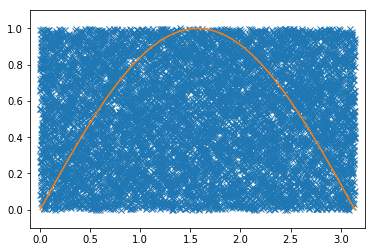

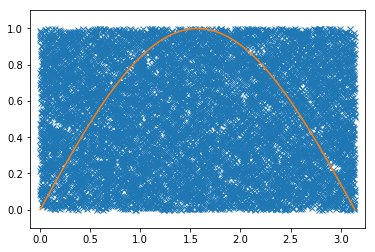

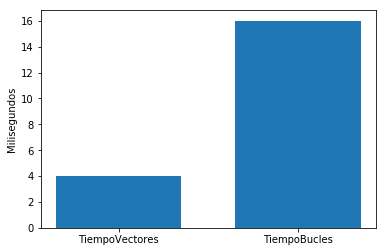

In [12]:
#main donde se llama a las funciones definidas anteriormente
integra_mc(np.sin,0,np.pi)
